# Random Forest Regression
Random Forest Regression is a supervised learning algorithm that uses ensemble learning methods for regression. Ensemble learning method is a technique that combines multiple machine learning algorithms to make precise prediction.

Performance of any random forest mainly depends upon two parameters  number of tree and number of tree decomposition.

Initially during training process each tree is created from randomly selected input vectors and thus is called a “random” forest.Each decision tree, a fitting function is created, which acts on the random variables selected and prediction is made.

Mathematically output of Random forest is average of prediction of all decision trees.
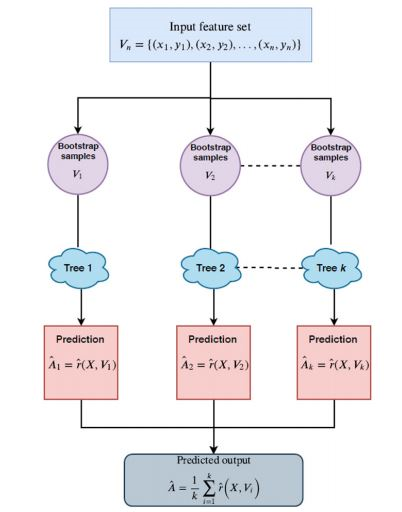

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd
import seaborn as sns
from pylab import rcParams

# Reading the CSV file (Excluding unnecessary)
df = pd.read_excel('Solar_Random_Forest.xlsx') 

In [35]:
df

,Date_Time,DHI,DNI,GHI,Clearsky GHI,Solar Zenith Angle
0,2014-01-01 00:00:00,0,0,0,0,175.426075
1,2014-01-01 01:00:00,0,0,0,0,170.489325
2,2014-01-01 02:00:00,0,0,0,0,156.868621
3,2014-01-01 03:00:00,0,0,0,0,143.264497
4,2014-01-01 04:00:00,0,0,0,0,129.769232
...,...,...,...,...,...,...
8755,2014-12-31 19:00:00,0,0,0,0,108.206509
8756,2014-12-31 20:00:00,0,0,0,0,121.356722
8757,2014-12-31 21:00:00,0,0,0,0,134.744441
8758,2014-12-31 22:00:00,0,0,0,0,148.285781


In [52]:
df.describe()

,DHI,DNI,GHI,Clearsky GHI,Solar Zenith Angle
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,103.085160,188.325342,233.906279,257.008447,89.771145
std,126.802487,254.621049,308.729208,331.718746,43.207493
min,0.000000,0.000000,0.000000,0.000000,3.799770
25%,0.000000,0.000000,0.000000,0.000000,52.489564
50%,0.000000,0.000000,0.000000,1.000000,89.837888
75%,215.000000,418.000000,502.000000,555.000000,126.837670
max,509.000000,798.000000,982.000000,1013.000000,177.471307


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Time           8760 non-null   datetime64[ns]
 1   DHI                 8760 non-null   int64         
 2   DNI                 8760 non-null   int64         
 3   GHI                 8760 non-null   int64         
 4   Clearsky GHI        8760 non-null   int64         
 5   Solar Zenith Angle  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 410.8 KB


In [53]:
df.corr()

,DHI,DNI,GHI,Clearsky GHI,Solar Zenith Angle
DHI,1.000000,0.809476,0.931649,0.960882,-0.889389
DNI,0.809476,1.000000,0.940717,0.897113,-0.796609
GHI,0.931649,0.940717,1.000000,0.985759,-0.871029
Clearsky GHI,0.960882,0.897113,0.985759,1.000000,-0.888753
Solar Zenith Angle,-0.889389,-0.796609,-0.871029,-0.888753,1.000000


In [36]:
X_train = df.drop(['GHI','Date_Time'],axis=1).iloc[:7008]
y_train = df['GHI'].iloc[:7008]
X_test = df.drop(['GHI','Date_Time'],axis=1).iloc[7008:]
y_test = df['GHI'].iloc[7008:]

In [30]:
print(X_train)

      DHI  DNI  Clearsky GHI  Solar Zenith Angle
0       0    0             0          175.426075
1       0    0             0          170.489325
2       0    0             0          156.868621
3       0    0             0          143.264497
4       0    0             0          129.769232
...   ...  ...           ...                 ...
7003    0    0             0          107.551214
7004    0    0             0          121.195875
7005    0    0             0          134.749738
7006    0    0             0          147.889569
7007    0    0             0          159.597984

[7008 rows x 4 columns]


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

# Random Forest Regression

In [50]:
reg = RandomForestRegressor()

In [38]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
reg.score(X_train,y_train)

0.9999495397431188

In [40]:
Y_pred = reg.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [41]:
reg.score(X_test,y_test)

0.9991738310885431

In [42]:
## Test RMSE VALUE XG Boost
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
print('Random Forest Regression for Test RMSE',np.sqrt(mean_squared_error(y_test,Y_pred)))
print('Random Forest Regression for Test MSE',mean_squared_error(y_test,Y_pred))
print('Random Forest Regression for Test MAE',mean_absolute_error(y_test,Y_pred))

Random Forest Regression for Test RMSE 7.340326388889923
Random Forest Regression for Test MSE 53.880391495433784
Random Forest Regression for Test MAE 3.409115296803652


**Hyperparameter Tuning** In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

# Steps to follow hyperparamerter tuning
**Step 1** Select the type of model we want to use like RandomForestClassifier, regressor or any other model

**Step 2** Check what are the parameters of the model

**Step 3** Select the methods for searching the hyperparameter

**Step 4** Select the cross-validation approach (In this example cv = 3)

**Step 5** Evaluate the model using the score

## Random Forest Regression GridSearchCV

***max_depth - The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.As the max depth of the decision tree increases, the performance of the model over the training set increases continuously. On the other hand as the max_depth value increases, the performance over the test set increases initially but after a certain point, it starts to decrease rapidly.***

***min_sample_split – a parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.When the parameter value increases too much, there is an overall dip in both the training score and test scores. This is due to the fact that the minimum requirement of splitting a node is so high that there are no significant splits observed. As a result, the random forest starts to underfit.***

***min_samples_leaf - This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.If its value increases after certain point than its starts overfitting model.***

***n_estimators - RFR is nothing but grouping of trees.Generally accuracy of model increases after certain level but later becomes stangant.This means that choosing a large number of estimators in a random forest model is not the best idea. Although it will not degrade the model, it can save you the computational complexity.***

**max_features - This resembles the number of maximum features provided to each tree in a random forest.As max_features increases train and test score increases but after threshold training accuracy increases but test accuracy becomes saturated.***

*Here we have used GridsearchCV for finding optimum features of Random Forest Regression*

In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [9]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [146]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [130, 120, 100, 110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 2],
    'min_samples_split': [8, 7, 6],
    'n_estimators': [100, 150, 200]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = 1, verbose = 2)

In [147]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.0s
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.0s
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=150, total=   1.3s
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=150, total=   1.2s
[CV] bootstrap=True, max_depth=130, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=130, max_features=2,

[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed: 24.5min finished


NameError: name 'evaluate' is not defined

In [148]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [149]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=100, max_features=4, min_samples_leaf=2,
                      min_samples_split=6, n_estimators=200)

In [49]:
reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.00, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=1,oob_score=False, random_state=0,
                      verbose=0,warm_start=False)

In [44]:
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=2, n_jobs=1, random_state=0)

In [45]:
Y_pred = reg.predict(X_test)
print(Y_pred)
a = pd.DataFrame(data=Y_pred)
a.to_csv('Result.csv')

[0. 0. 0. ... 0. 0. 0.]


In [46]:
print('Random Forest Regression for Test RMSE',np.sqrt(mean_squared_error(y_test,Y_pred)))
print('Random Forest Regression for Test MSE',mean_squared_error(y_test,Y_pred))
print('Random Forest Regression for Test MAE',mean_absolute_error(y_test,Y_pred))

Random Forest Regression for Test RMSE 6.50133714293596
Random Forest Regression for Test MSE 42.26738464611872
Random Forest Regression for Test MAE 3.0622431506849312


In [47]:
reg.score(X_train,y_train)

0.9999434773086093

In [48]:
reg.score(X_test,y_test)

0.9993518978204498

In [54]:
# Have a look at RMSE, MSE and MAE value obtained earlier and now...
# Hence we have improve RFR model performance by using hyperparameter optimization